## Assignment A1b: Functions and Computation

In [28]:
# Appropriate Libraries:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import wave

### 1. Common functions

### 1a. `sinewave`

In [68]:
def sinewave(t, f=1.0, d=0.0):
    if(type(t)==list):
        t = np.array(t)
    phi = -2 * np.pi * d * f
    return np.sin(2 * np.pi * f * t + phi)

In [75]:
#testing
sinewave(0.0, f=5, d=0.05)

-1.0

A quick graph:

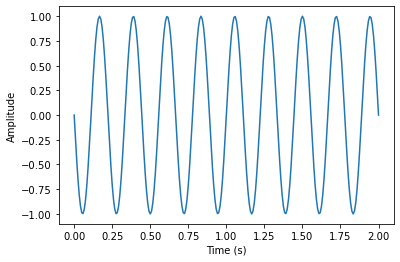

In [4]:
t_120Hz = np.linspace(0,2,num=120*2+1) # 120Hz denotes sampling rate
sine_vals = sinewave(t_120Hz, f=4.5, d= 1.0)
plt.plot(t_120Hz, sine_vals)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

#### 1)
Formula: 

$\text{time}\times f_{s} = i$

Unit Analysis:

$\text{seconds} \times \text{Hz}= \text{seconds} \times \frac{\text{samples}}{\text{second}}= \text{samples}$

#### 2)
Formula:

$-\text{delay} \times f_{s} \times 2\pi = \text{phase} = \phi$

Unit Analysis:

$\text{seconds} \times \frac{\text{cycles}}{\text{second}} \times \frac{\text{radians}}{\text{second}} = \text{radians}$


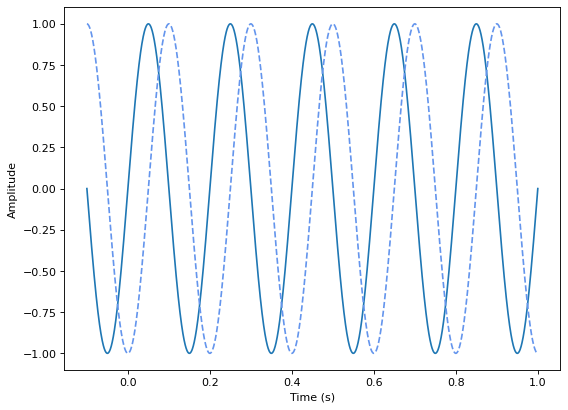

In [69]:
figure(figsize=(8, 6), dpi=80)
t_1000Hz = np.linspace(-0.1,1.0,num=1000*2+1) # 1000Hz denotes sampling rate
sine_vals = sinewave(t_1000Hz, f=5, d= 0.0)
sine_vals_delayed = sinewave(t_1000Hz, f=5, d= 0.05)
plt.plot(t_1000Hz, sine_vals)
plt.plot(t_1000Hz, sine_vals_delayed, '--', c="cornflowerblue")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

### 1b. `gabor`

In [95]:
def gabor (t, a=1.0, sigma=1, f = 1.0, phi = 0.0):
    return a * np.exp((-t**2)/(2.0 * (sigma**2))) * np.cos(2*np.pi*f*t+phi)

def gabore (t, a=1.0, sigma=1, f = 1.0):
    return gabor(t, a, sigma, f=f, phi=0.0)

def gaboro (t, a=1.0, sigma=1, f = 1.0):
    return gabor(t, a, sigma, f=f, phi=(np.pi/2))   

In [78]:
#testing
gaboro(-3, f=0.0625, sigma=8)

0.8611504148937256

In [141]:
def gabor_norm(fs, sigma=1, f=1.0, phi=0.0):
    vanish_point = math.sqrt(-math.log(0.01)*2*(sigma)**2)
    time_val = -vanish_point
    t =[]
    while time_val < vanish_point:
        t.append(time_val)
        time_val += 1/fs
    
    gabor_vals = []
    for t_val in t:
        gabor_vals.append(gabor(t_val, a=1.0, sigma=sigma, f=f, phi=phi))
    return np.linalg.norm(gabor_vals, ord=2)

def gabore_norm(fs, sigma=1, f=1.0):
    vanish_point = math.sqrt(-math.log(0.01)*2*(sigma)**2)
    time_val = -vanish_point
    t =[]
    while time_val < vanish_point:
        t.append(time_val)
        time_val += 1/fs
    
    gabor_vals = []
    for t_val in t:
        gabor_vals.append(gabore(t_val, a=1.0, sigma=sigma, f=f))
    return np.linalg.norm(gabor_vals, ord=2)

def gaboro_norm(fs, sigma=1, f=1.0):
    vanish_point = math.sqrt(-math.log(0.01)*2*(sigma)**2)
    time_val = -vanish_point
    t =[]
    while time_val < vanish_point:
        t.append(time_val)
        time_val += 1/fs
    
    gabor_vals = []
    for t_val in t:
        gabor_vals.append(gaboro(t_val, a=1.0, sigma=sigma, f=f))
    return np.linalg.norm(gabor_vals, ord=2) 

In [86]:
# gabor_norm(fs=10, sigma=4)

2.9769337214982743


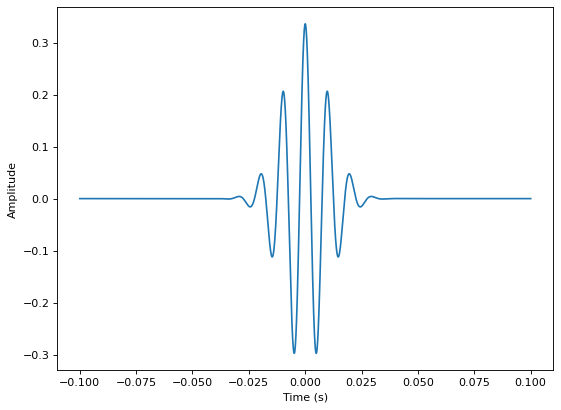

In [179]:
fs = 1000 #1000 Hz
sigma = 1/100
f = 100
t = np.linspace(-.1, .1, num=2*1000*fs+1)
gabore_vals = []
norm = gabore_norm(fs=1000, sigma=sigma, f=f)
print(norm)
for t_val in t:
    gabore_vals.append(gabore(t_val, sigma=sigma, f=f, a=1/norm))

figure(figsize=(8, 6), dpi=80)

plt.plot(t, gabore_vals)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

In [161]:
a_norm = gaboro_norm(fs=10000, f=100, sigma=0.01)
gaboro(0.003, f=100, sigma=0.01, a=1/a_norm)

-0.09658160376719177

### 1c. `gammatone`

In [8]:
def gammatone (t, n:int=4, f=1.0, phi=0.0):
    if(type(t)==list):
        t = np.array(t)
    b = 1.019*(24.7*(((4.37*f)/1000) + 1))
    gamma_value = (t**(n-1))*np.exp(-2*np.pi*b*t)*np.cos(2*np.pi*f*t + phi)
    return gamma_value / np.amax(gamma_value)


In [9]:
#testing
gammatone(0.01, f=100)

1.0

A quick graph:

In [63]:
t_20000Hz = np.linspace(0,1,num=20000*1+1) # 20000Hz denotes sampling rate
gammatone_vals = gammatone(t_20000Hz, f=200.0)

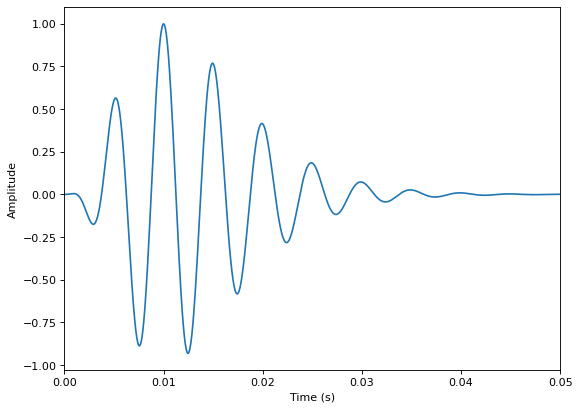

In [65]:
figure(figsize=(8, 6), dpi=80)
plt.plot(t_20000Hz, gammatone_vals)
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.xlim((0, 0.05))
plt.show()

### 2. Simple computation

### 2a. `localmaxima`|

In [12]:
def localmaxima(data):
    local_maxima_indices = []
    for i in range(len(data)):
        if i != 0 and i != len(data)-1:
            if data[i-1] < data[i] and data[i] > data[i+1]:
                local_maxima_indices.append(i)
    return local_maxima_indices

An illustrative graph:

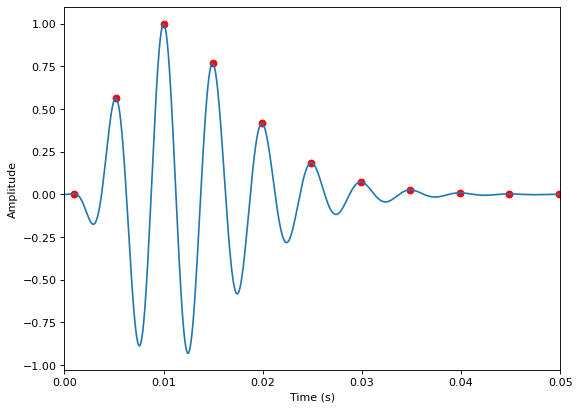

In [62]:
# First getting the local maxima so I can graph them:
t_20000Hz = np.linspace(0,1,num=20000*1+1) # 20000Hz denotes sampling rate
gammatone_vals = gammatone(t_20000Hz, f=200.0)

local_maxima_indices = localmaxima(gammatone_vals)
local_maxima_times = []
local_maxima_values = []
for index in local_maxima_indices:
    local_maxima_times.append(t_20000Hz[index])
    local_maxima_values.append(gammatone_vals[index])

figure(figsize=(8, 6), dpi=80)
plt.plot(t_20000Hz, gammatone_vals)
plt.scatter(local_maxima_times, local_maxima_values, c='#ff0000')
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.xlim((0, 0.05))
plt.show()

In [74]:
print(localmaxima([1, 3, 2, -2, 2, 4, 8, 6]))

[1, 6]


### 2b. `crossings`


In [14]:
def crossings (data, threshold, dir:str="both"):
    crossings_indices = []
    for i in range(len(data)):
        if i != 0:
            if data[i] >= threshold and data[i-1] < threshold:
                if dir == "both" or dir == "negpos":
                    crossings_indices.append(i)
            elif data[i] <= threshold and data[i-1] > threshold:
                if dir == "both" or dir == "posneg":
                    crossings_indices.append(i)
    return crossings_indices

A graph:

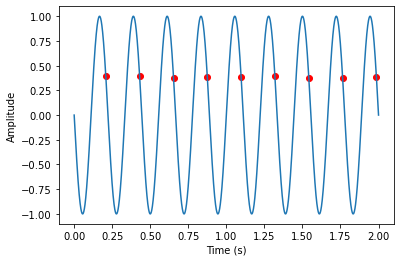

In [15]:
t_1000Hz = np.linspace(0,2,num=1000*2+1) # 120Hz denotes sampling rate
sine_vals = sinewave(t_1000Hz, f=4.5, d= 1.0)

crossings_indices = crossings(sine_vals, 0.4, dir="posneg")
crossings_times = []
crossings_vals = []
for index in crossings_indices:
    crossings_times.append(t_1000Hz[index])
    crossings_vals.append(sine_vals[index])

plt.plot(t_1000Hz, sine_vals)
plt.scatter(crossings_times, crossings_vals, c="#ff0000")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()

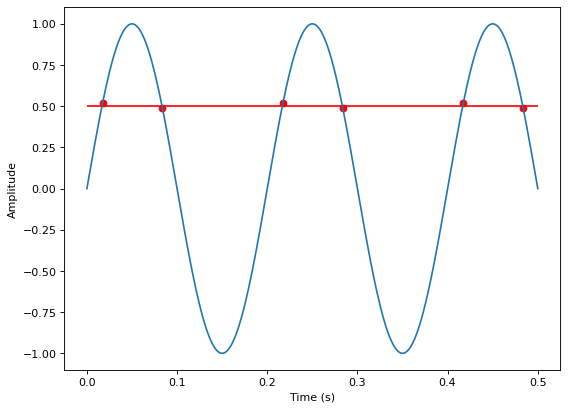

In [59]:
t_200Hz = np.linspace(0,0.5,num=200*2+1) # 200Hz denotes sampling rate
sine_vals = sinewave(t_200Hz, f=5, d= 1.0)

crossings_indices = crossings(sine_vals, 0.5, dir="both")
crossings_times = []
crossings_vals = []
for index in crossings_indices:
    crossings_times.append(t_200Hz[index])
    crossings_vals.append(sine_vals[index])

figure(figsize=(8, 6), dpi=80)
plt.plot(t_200Hz, sine_vals)
plt.hlines(0.5, xmin=0.0, xmax=0.5, colors="#ff0000")
plt.scatter(crossings_times, crossings_vals, c="#ff0000")
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.show()


### 2c. `envelope`

In [16]:
def envelope(y, nblocks):
    num_samples_per_block = math.ceil(len(y)/nblocks)
    block_indices = [0]
    y_lower = []
    y_upper = []
    max_per_block = y[0]
    min_per_block = y[0]
    for i in range(len(y)):
        if i != 0 and i % num_samples_per_block == 0:
            block_indices.append(i)
            y_upper.append(max_per_block)
            y_lower.append(min_per_block)
            max_per_block = y[i]
            min_per_block = y[i]
        elif i == len(y) - 1:
            y_upper.append(max_per_block)
            y_lower.append(min_per_block)
        else:
            if y[i] > max_per_block:
                max_per_block = y[i]
            elif y[i] < min_per_block:
                min_per_block = y[i]
    return y_lower, y_upper, block_indices

In [23]:
speech = wave.open('speech.wav', mode='rb')
speech_data = speech.readframes(speech.getnframes())
speech_data = list(speech_data)
type(speech_data)
y_lower, y_upper, block_indices = envelope(speech_data, 5000)

list

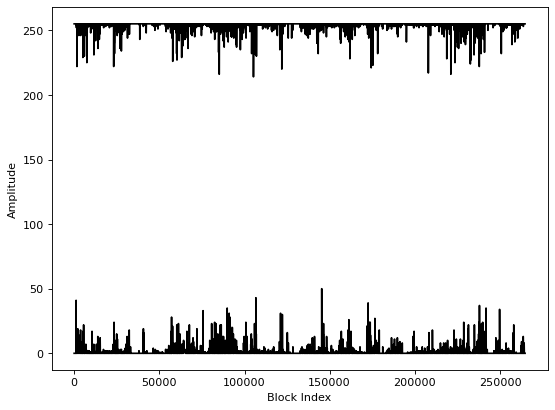

In [42]:
figure(figsize=(8, 6), dpi=80)
plt.plot(block_indices, y_upper, c="000000")
plt.plot(block_indices, y_lower, c="000000")
plt.ylabel("Amplitude")
plt.xlabel("Block Index")
plt.show()

In [50]:
framerate = speech.getframerate()
cut_speech_data = speech_data[round(3.0*framerate):round(3.1 * framerate)]

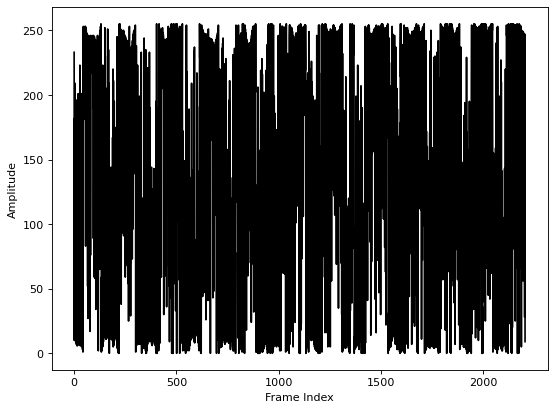

In [51]:
figure(figsize=(8, 6), dpi=80)
plt.plot(range(len(cut_speech_data)), cut_speech_data, c="000000")
plt.ylabel("Amplitude")
plt.xlabel("Frame Index")
plt.show()

In [70]:
y = [5, 5, 2, 3, 4, 3, -6, -9, 0, -3, 9, -7]
ylower, yupper, blockindices = envelope(y, nblocks=3)